In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv("C:\\Anaconda\\Health_insurance_price_prediction\\insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


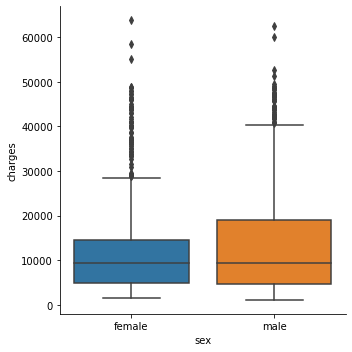

In [7]:
sns.catplot(x='sex',y='charges',kind='box',data=df)

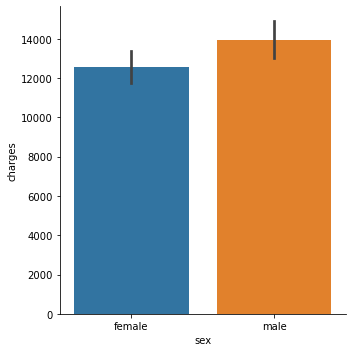

In [8]:
sns.catplot(x='sex',y='charges',kind='bar',data=df)

<AxesSubplot:ylabel='sex'>

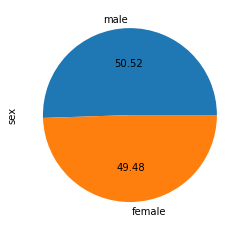

In [9]:
df['sex'].value_counts().plot(kind='pie'  , autopct='%0.2f')

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

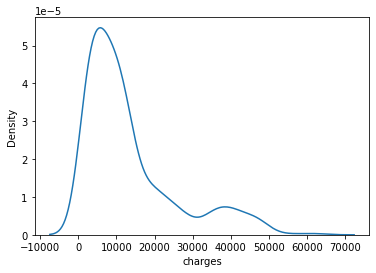

In [10]:
sns.distplot(df['charges'],hist=False)

In [11]:
from sklearn.preprocessing import OneHotEncoder

In [12]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

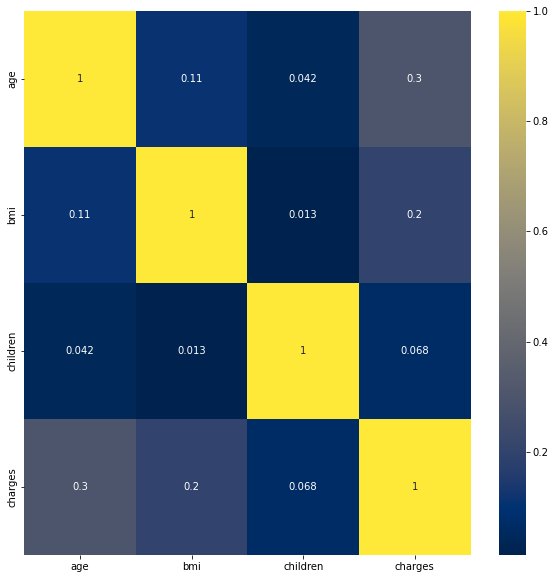

In [13]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(df.corr(), annot=True, cmap='cividis')

In [14]:
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [15]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='charges'>

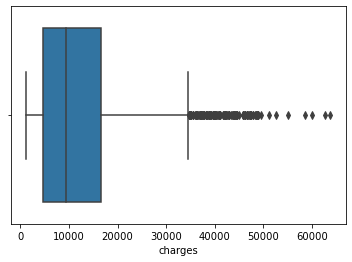

In [16]:
sns.boxplot(df['charges'])

In [17]:
from sklearn.preprocessing import StandardScaler
transformation = ColumnTransformer(transformers=[
    ('tnf1',StandardScaler(),['age','bmi']),
    ('tnf2',OneHotEncoder(sparse=False , handle_unknown='ignore'),['sex','children','smoker','region'])
],remainder='passthrough')

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn import metrics
x = df.drop(['charges'], axis = 1)
y = df['charges']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
Lin_reg = LinearRegression()
pipe = make_pipeline(transformation,Lin_reg)
#Lin_reg.fit(x_train, y_train)
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf1', StandardScaler(),
                                                  ['age', 'bmi']),
                                                 ('tnf2',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['sex', 'children', 'smoker',
                                                   'region'])])),
                ('linearregression', LinearRegression())])

In [19]:
y_test_pred = pipe.predict(x_test)

In [20]:
from sklearn.metrics import r2_score

In [21]:
r2_score(y_test_pred,y_test) #Accuracy of linear regression is 72%

0.7213985512962464

In [22]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error: 3994.4787473981974
Mean Squared Error: 32088433.293003395
Root Mean Squared Error: 5664.665329302641


In [23]:
y_test_pred = pipe.predict(x_test)
##Comparing the actual output values with the predicted values
pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

,Actual,Predicted
578,9724.53000,11135.738049
610,8547.69130,9446.440079
569,45702.02235,38866.313898
1034,12950.07120,16130.198413
198,9644.25250,6829.594648
...,...,...
1084,15019.76005,15502.728401
726,6664.68595,8218.963672
1132,20709.02034,16035.657792
725,40932.42950,32170.062486


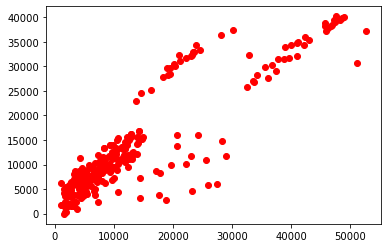

In [24]:
predictions = pipe.predict(x_test)
plt.scatter(y_test,predictions, c ='red')

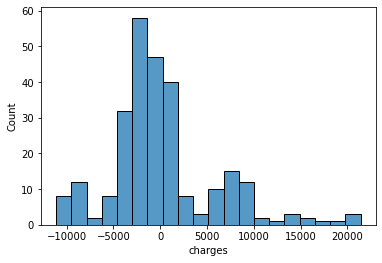

In [25]:
sns.histplot((y_test-predictions),bins=20);

In [26]:
from sklearn.ensemble import RandomForestRegressor
predictive_model = RandomForestRegressor(random_state=1)
pipe = make_pipeline(transformation,predictive_model)
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)

In [27]:
r2_score(y_pred,y_test) #Accuracy from random forest is about 86%

0.8704078289343272

In [28]:
import pickle

In [29]:
pickle.dump(pipe,open('pipe_rf.pkl','wb'))

In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
clf_tree = DecisionTreeRegressor(max_depth=3,max_leaf_nodes=8,splitter="best", random_state=1)

In [31]:
pipe = make_pipeline(transformation,clf_tree)

In [32]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf1', StandardScaler(),
                                                  ['age', 'bmi']),
                                                 ('tnf2',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['sex', 'children', 'smoker',
                                                   'region'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=3, max_leaf_nodes=8,
                                       random_state=1))])

In [33]:
y_pred = pipe.predict(x_test)

In [34]:
r2_score(y_pred,y_test) #r2_score of Desicion Tree is maximum and is 88%

0.8724185968648906

          Gini-importance
sex              0.172460
age              0.113753
bmi              0.000000
children         0.000000
smoker           0.000000
region           0.000000


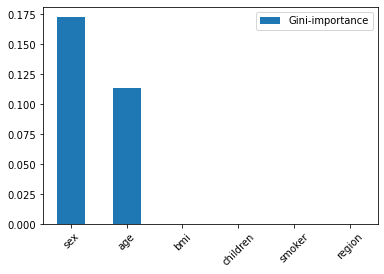

In [35]:
feats = {}
for feature, importance in zip(x_train.columns, clf_tree.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance',ascending=False).plot(kind='bar', rot=45)
print(importances.sort_values(by='Gini-importance',ascending=False))
plt.show()

In [36]:
import pickle

In [37]:
pickle.dump(pipe,open('pipe2.pkl','wb'))

In [38]:
pickle.dump(df,open('df.pkl','wb'))